In [216]:
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt



In [217]:
data('co2', show_doc=True)
co2 = data('co2')

co2

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Mauna Loa Atmospheric CO2 Concentration

### Description

Atmospheric concentrations of CO_2_ are expressed in parts per million (ppm)
and reported in the preliminary 1997 SIO manometric mole fraction scale.

### Usage

    co2

### Format

A time series of 468 observations; monthly from 1959 to 1997.

### Details

The values for February, March and April of 1964 were missing and have been
obtained by interpolating linearly between the values for January and May of
1964.

### Source

Keeling, C. D. and Whorf, T. P., Scripps Institution of Oceanography (SIO),
University of California, La Jolla, California USA 92093-0220.

ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2.

### References

Cleveland, W. S. (1993) _Visualizing Data_. New Jersey: Summit Press.

### Examples

    require(graphics)
    plot(co2, ylab = expression("Atmospheric concentration of CO"[2]),
         las = 1)
    t

## Review of Basic Statistics - Simple Linear Regression

```
Yi = linear model plus noise
  = (B0 + B1X1) + E1
```

```
Q = Sum of (Observed - Predicted)^2

Yi = i-th observed response variable
Zi = i-th predicted response variable
   = slope * Xi + intercept
```   
We need to find a good value for slope and intercept

```
slope = b1 = SSxy/SSxx = SumOf( (x1 - x0)(yi - y0) ) / SumOf( x1 - x0 )( x1 - x0 )

intercept = b0 = y0 - b1 * x0
```

In [218]:
x0 = co2['time'].mean()
y0 = co2['co2'].mean()
x1_x0 = co2['time'] - x0
SSxy = sum(x1_x0 * (co2['co2'] - y0))
SSxx = sum(x1_x0 * x1_x0)

slope = SSxy / SSxx
slope

1.307496690611379

In [219]:
intercept = y0 - slope * x0
intercept

-2249.774197706991

If we use numpy's linalg.lstsq algorithm, we might achieve the same thing

```
co2.linear.model = lm(co2 ~ time(co2) )
```

In [220]:
n = np.max(co2['time'].shape)
my_x = np.vstack([co2['time'], np.ones(n)]).T
n, my_x

lm = np.linalg.lstsq(a=my_x, b=co2['co2'], rcond=None)
slope, intercept = lm[0]
slope, intercept

(1.3074966906113779, -2249.7741977069886)

In [221]:
lm[1]

array([3194.08042306])

### Plot the line with the data

```
plot(co2, main="Atmospheric CO2 Concentration with fitted line")
abline(co2.linear.model)
```

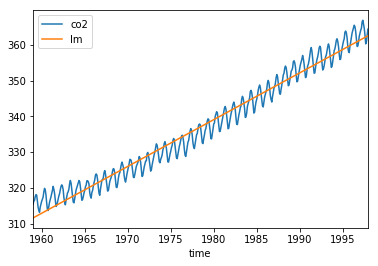

In [222]:
co2["lm"] = slope * co2["time"] + intercept

co2.plot(x='time', y=["co2", "lm"])

Reviewing Basic Statistics II More Linear Regression

```
co2.residuals = resid(co2.lm)
hist(co2.residuals, main="Histogram of Residuals")
```

In [223]:
lm

(array([ 1.30749669e+00, -2.24977420e+03]),
 array([3194.08042306]),
 2,
 array([4.28012962e+04, 1.23101097e-01]))

### From readings

```
co2.fitted.values = slope*co2.times + intercept
co2.residuals = co2.values - co2.fitted.values
```

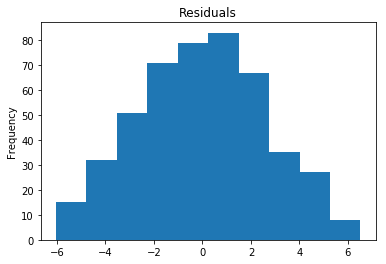

In [224]:
co2["resids"] = co2["co2"] - co2["lm"]
co2["resids"].plot.hist(title="Residuals")

### Obtaining the qqnorm

```
qqnorm(co2.residuals)
qqline(co2.residuals)
```

Read from https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

((array([-2.97186429e+00, -2.68816597e+00, -2.52851125e+00, -2.41523836e+00,
         -2.32644001e+00, -2.25290304e+00, -2.18984559e+00, -2.13445430e+00,
         -2.08492857e+00, -2.04004385e+00, -1.99892811e+00, -1.96093756e+00,
         -1.92558286e+00, -1.89248302e+00, -1.86133539e+00, -1.83189543e+00,
         -1.80396256e+00, -1.77737020e+00, -1.75197839e+00, -1.72766837e+00,
         -1.70433847e+00, -1.68190096e+00, -1.66027959e+00, -1.63940763e+00,
         -1.61922636e+00, -1.59968383e+00, -1.58073381e+00, -1.56233501e+00,
         -1.54445038e+00, -1.52704655e+00, -1.51009333e+00, -1.49356335e+00,
         -1.47743168e+00, -1.46167558e+00, -1.44627421e+00, -1.43120846e+00,
         -1.41646073e+00, -1.40201480e+00, -1.38785566e+00, -1.37396942e+00,
         -1.36034318e+00, -1.34696494e+00, -1.33382353e+00, -1.32090851e+00,
         -1.30821014e+00, -1.29571927e+00, -1.28342736e+00, -1.27132636e+00,
         -1.25940872e+00, -1.24766732e+00, -1.23609544e+00, -1.22468676e+00,

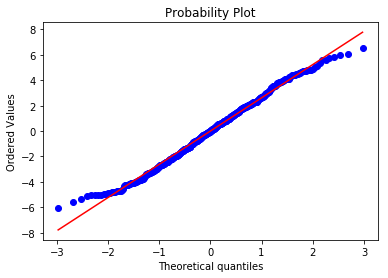

In [225]:
import scipy.stats as stats
import pylab

stats.probplot(co2["resids"], dist="norm", plot=plt)

((array([-2.97186429e+00, -2.68816597e+00, -2.52851125e+00, -2.41523836e+00,
         -2.32644001e+00, -2.25290304e+00, -2.18984559e+00, -2.13445430e+00,
         -2.08492857e+00, -2.04004385e+00, -1.99892811e+00, -1.96093756e+00,
         -1.92558286e+00, -1.89248302e+00, -1.86133539e+00, -1.83189543e+00,
         -1.80396256e+00, -1.77737020e+00, -1.75197839e+00, -1.72766837e+00,
         -1.70433847e+00, -1.68190096e+00, -1.66027959e+00, -1.63940763e+00,
         -1.61922636e+00, -1.59968383e+00, -1.58073381e+00, -1.56233501e+00,
         -1.54445038e+00, -1.52704655e+00, -1.51009333e+00, -1.49356335e+00,
         -1.47743168e+00, -1.46167558e+00, -1.44627421e+00, -1.43120846e+00,
         -1.41646073e+00, -1.40201480e+00, -1.38785566e+00, -1.37396942e+00,
         -1.36034318e+00, -1.34696494e+00, -1.33382353e+00, -1.32090851e+00,
         -1.30821014e+00, -1.29571927e+00, -1.28342736e+00, -1.27132636e+00,
         -1.25940872e+00, -1.24766732e+00, -1.23609544e+00, -1.22468676e+00,

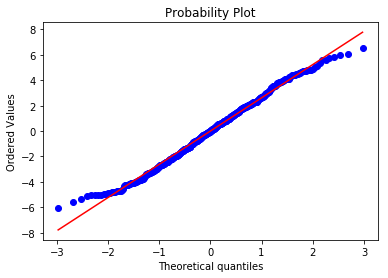

In [226]:
stats.probplot(co2["resids"], dist="norm", plot=pylab)

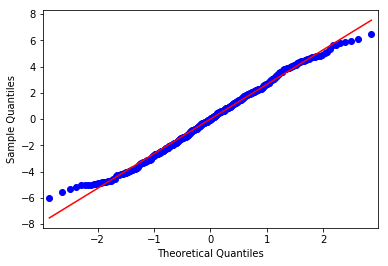

In [227]:
import statsmodels.api as sm


# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

# line (str {'45', 's', 'r', q'} or None) –
# Options for the reference line to which the data is compared:

# ‘45’ - 45-degree line
# ’s‘ - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
# ’r’ - A regression line is fit
# ’q’ - A line is fit through the quartiles.
# None - by default no reference line is added to the plot.

sm.qqplot(co2["resids"], line='r')
plt.show()

### scatter plot for co2 residuals vs time

```
plot( co2.residuals ~ time(co2) )
```

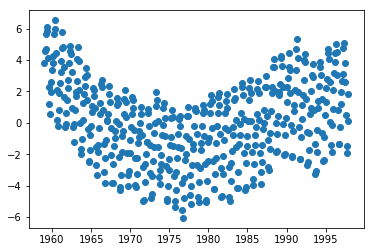

In [228]:
plt.scatter(x=co2['time'], y=co2['resids'])
plt.show()

### Zoom in on the analysis of the co2 data

```
plot(co2.residuals ~ time(co2),
  xlim=c(1960, 1963)
  main="Zoomed Residuals")
```

Using the pydataset, we can use pandas dataframe.plot
```
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
```

xlim : 2-tuple/list


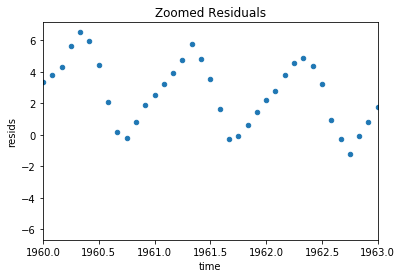

In [229]:
co2.plot(kind="scatter", x='time', y='resids', xlim=(1960,1963), title="Zoomed Residuals")

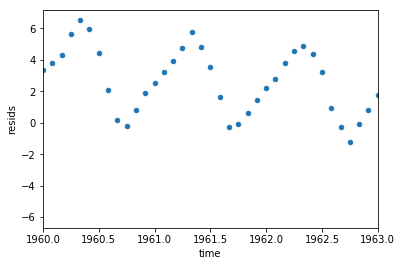

In [230]:
co2.plot.scatter(x='time', y='resids', xlim=(1960,1963))

## Reviewing Basic Statistics III

help(sleep)

In [231]:
data('sleep', show_doc=True)
sleep = data('sleep')

sleep

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Student's Sleep Data

### Description

Data which show the effect of two soporific drugs (increase in hours of sleep
compared to control) on 10 patients.

### Usage

    sleep

### Format

A data frame with 20 observations on 3 variables.

[, 1]

extra

numeric

increase in hours of sleep

[, 2]

group

factor

drug given

[, 3]

ID

factor

patient ID

### Details

The `group` variable name may be misleading about the data: They represent
measurements on 10 persons, not in groups.

### Source

Cushny, A. R. and Peebles, A. R. (1905) The action of optical isomers: II
hyoscines. _The Journal of Physiology_ **32**, 501–510.

Student (1908) The probable error of the mean. _Biometrika_, **6**, 20.

### References

Scheffé, Henry (1959) _The Analysis of Variance_. New York, NY: Wiley.

### Examples

    require(stats)
    ## Student's paired t-test
    with(sleep,
         t.test(extra[group =

### Gossett Data

```
plot(extra ~ group,
   data=sleep,
   main="Extra Sleep in Gossett Data by Group")
attach(sleep)
extra.1 = extra[group == 1]
extra.2 = extra[group == 2]
```

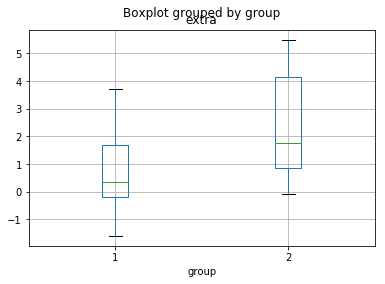

In [232]:
sleep.boxplot(by='group', column='extra')

In [233]:
import pandas as pd

# calculation of t-statistic and p-value
extra1 = sleep[sleep.group==1]['extra']
my_extra1 = extra1.dropna().reset_index(drop=True).reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
extra2 = sleep[sleep.group==2]['extra']
my_extra2 = extra2.dropna().reset_index(drop=True).reindex([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

extra2

11    1.9
12    0.8
13    1.1
14    0.1
15   -0.1
16    4.4
17    5.5
18    1.6
19    4.6
20    3.4
Name: extra, dtype: float64

In [234]:
extra_dict = {'extra1':extra1, 'extra2': extra2 }
extra_dict

{'extra1': 1     0.7
 2    -1.6
 3    -0.2
 4    -1.2
 5    -0.1
 6     3.4
 7     3.7
 8     0.8
 9     0.0
 10    2.0
 Name: extra, dtype: float64, 'extra2': 11    1.9
 12    0.8
 13    1.1
 14    0.1
 15   -0.1
 16    4.4
 17    5.5
 18    1.6
 19    4.6
 20    3.4
 Name: extra, dtype: float64}

In [235]:
# drop this method lah.  The better method is to just create it as a numpy array which detects for NaN too.
extras_from_dict = pd.DataFrame(extra_dict)
extras_from_dict

,extra1,extra2
1,0.7,NaN
2,-1.6,NaN
3,-0.2,NaN
4,-1.2,NaN
5,-0.1,NaN
6,3.4,NaN
7,3.7,NaN
8,0.8,NaN
9,0.0,NaN
10,2.0,NaN


In [236]:
# How donaq did it, by using numpy to setup the array
extra_np = np.array([extra1,extra2])
extra_np

array([[ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ],
       [ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4]])

In [237]:
# np.ndarray.T - Same as self.transpose(), except that self is returned if self.ndim < 2.
# This is a matrix transform from horizontal to vertical - pandas prefers to analyze by vertical?
extra_np.T

array([[ 0.7,  1.9],
       [-1.6,  0.8],
       [-0.2,  1.1],
       [-1.2,  0.1],
       [-0.1, -0.1],
       [ 3.4,  4.4],
       [ 3.7,  5.5],
       [ 0.8,  1.6],
       [ 0. ,  4.6],
       [ 2. ,  3.4]])

In [238]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
extras = pd.DataFrame(extra_np.T, columns=['extra1','extra2'])
extras

,extra1,extra2
0,0.7,1.9
1,-1.6,0.8
2,-0.2,1.1
3,-1.2,0.1
4,-0.1,-0.1
5,3.4,4.4
6,3.7,5.5
7,0.8,1.6
8,0.0,4.6
9,2.0,3.4


### Test your Hypothesis

```
t.test(extra.1, extra.2, paired = TRUE, alternative="two.sided")
```

This means: run a paired t-test, with data = extra by group.  The alternative hypothesis is true difference in means is not equal to 0.

Also read:
https://www.rdocumentation.org/packages/stats/versions/3.6.0/topics/t.test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html?highlight=ttest#scipy.stats.ttest_rel
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [239]:
# Not to be confused with ttest_ind which performs paired=FALSE
# ttest_rel
# Calculate the T-test on TWO RELATED samples of scores, a and b.

tresult, pval = stats.ttest_rel(extras['extra1'], extras['extra2'])
tresult, pval

(-4.062127683382037, 0.00283289019738427)

In [240]:
### Alternative approach by calculating confidence interval
extras['diff'] = extras['extra1'] - extras['extra2']
diff_mean = extras['diff'].mean()

extras['diff'], diff_mean

(0   -1.2
 1   -2.4
 2   -1.3
 3   -1.3
 4    0.0
 5   -1.0
 6   -1.8
 7   -0.8
 8   -4.6
 9   -1.4
 Name: diff, dtype: float64, -1.58)

In [241]:
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

# Using scipy.stats.sem to calculate mean of difference
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html#scipy.stats.sem

stats.t.interval(0.95, len(extras['diff'])-1, loc=diff_mean, scale=stats.sem(extras['diff']))


(-2.4598857632547286, -0.7001142367452713)

 ### Unpacking this output
 
 H0: Mean response is the same for both drugs, or
   H0: extras.drug1 - extras.drug2 == extras.diff = 0
   
 H1: Mean response is not the same for both drugs, or
   H1: extras.drug1 - extras.drug2 == extras.diff <> 0
 
 ```
 H0 is the null hypothesis
 H1 is the alternative hypothesis, and in this case, because it is not-equal, a two-sided hypothesis
 ```
 
 t = (diff.mean - 0) / ( std deviation - sqrt( number of samples ) )
 
We're going to take s sub d. So, this is the sample standard deviation of the differences.

That's not going to be the same number generally speaking, as if you take the standard deviation of the first data set, and subtract off the standard deviation of the second.

In [242]:
# What the guy said exactly not to do.
not_sd = stats.tstd(extras['extra2']) - stats.tstd(extras['extra1'])

stats.tstd(extras['extra1']),stats.tstd(extras['extra2']), not_sd

(1.7890096577591623, 2.002248735796829, 0.21323907803766673)

In [243]:
sd = stats.tstd(extras['diff'])

# ddof : int, optional
# Means Delta Degrees of Freedom. 
# The divisor used in calculations is N - ddof, 
# where N represents the number of elements. 
# By default ddof is zero.

sd, np.std(extras['diff']), np.std(extras['diff'], ddof=1)

(1.2299954832798732, 1.1668761716651856, 1.2299954832798732)

### Inference probability plots

```
qqnorm(diffs, main= "Normal Probability Plot")
qqline(diffs)
```

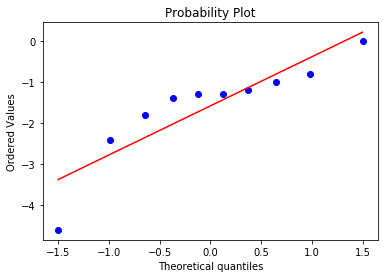

In [255]:
stats.probplot(extras['diff'],plot=plt)
plt.show()

### Confidence Interval

```
Estimate +/- Table Value * (Estimated) Standard Error

diff.mean +/- t.alpha_div_2 * Stderr / sqrt(n)
```

In [251]:
extras['diff'].quantile(0.95)

-0.3600000000000009

## Measuring Linear Association with the Correlation Function



In [253]:
trees = data('trees')
data('trees', show_doc=True)

trees

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Girth, Height and Volume for Black Cherry Trees

### Description

This data set provides measurements of the girth, height and volume of timber
in 31 felled black cherry trees. Note that girth is the diameter of the tree
(in inches) measured at 4 ft 6 in above the ground.

### Usage

    trees

### Format

A data frame with 31 observations on 3 variables.

`[,1]`

`Girth`

numeric

Tree diameter in inches

`[,2]`

`Height`

numeric

Height in ft

`[,3]`

`Volume`

numeric

Volume of timber in cubic ft

### Source

Ryan, T. A., Joiner, B. L. and Ryan, B. F. (1976) _The Minitab Student
Handbook_. Duxbury Press.

### References

Atkinson, A. C. (1985) _Plots, Transformations and Regression_. Oxford
University Press.

### Examples

    require(stats); require(graphics)
    pairs(trees, panel = panel.smooth, main = "trees data")
    plot(Volume ~ Girth, data = trees, log = "xy")
    coplot(log

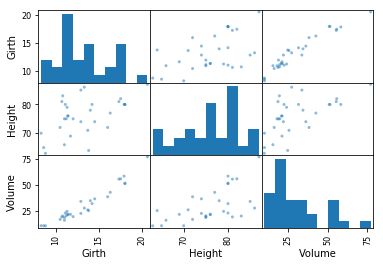

In [258]:
pd.plotting.scatter_matrix(trees)
plt.show()

In [259]:
# Calculate the covariance

trees.cov()

,Girth,Height,Volume
Girth,9.847914,10.383333,49.888118
Height,10.383333,40.600000,62.660000
Volume,49.888118,62.660000,270.202796


In [261]:
# Calculate the correlation

trees.corr()

,Girth,Height,Volume
Girth,1.000000,0.51928,0.967119
Height,0.519280,1.00000,0.598250
Volume,0.967119,0.59825,1.000000
